# Analysis of Norwegian and German electricity markets

## Importing data

### Importing packages

In [1]:
# Importing packages that will be used to solve the different tasks.

import glob                            
import pandas as pd
import matplotlib.pyplot as plt

### Importing dataset 1: DayAheadPrices

In [2]:
data = []                                                                               # Creates a empty list.

DATA_PATH = './data/DayAheadPrices_12.1.D'                                              # The data path to dataset 1: DayAheadPrices..

files = glob.glob(f'{DATA_PATH}/*')                                                     # Using glob.glob and wildcard * to add all datafiles .

for file in files:                                                                      # Using a for loop to loop through the datafiles found with glob.glob.
    fn = pd.read_csv(file, sep ='\t', parse_dates=['DateTime'], index_col='DateTime',   # Reads the csv file, parsing datetime string into datetime objects, and adding 'DateTime' as the index.
        usecols=['DateTime','ResolutionCode','MapCode','Price'])                        # Restricting the data to only relevant columns.
    
    data.append(fn)                                                                     # Appending the dataframe to the list data.

df = pd.concat(data).sort_index(ascending=True)                                         # Mergin all the data creating one dataFrame, also sorts the DateTime index.
df = df.query('MapCode == "NO2" or MapCode == "DE_LU" and ResolutionCode == "PT60M"')   # Further restricting the data to only NO2 and germany, and hourly observations.
df

,ResolutionCode,MapCode,Price
DateTime,,,
2019-01-01 00:00:00,PT60M,NO2,49.25
2019-01-01 00:00:00,PT60M,DE_LU,10.07
2019-01-01 01:00:00,PT60M,DE_LU,-4.08
2019-01-01 01:00:00,PT60M,NO2,49.17
2019-01-01 02:00:00,PT60M,DE_LU,-9.91
...,...,...,...
2023-12-31 21:00:00,PT60M,NO2,61.77
2023-12-31 22:00:00,PT60M,DE_LU,2.44
2023-12-31 22:00:00,PT60M,NO2,59.31


### Importing dataset 2: PhysicalFlows

In [3]:
data = []                                                                                  # Creates a empty list.                              

DATA_PATH = './data/PhysicalFlows_12.1.G'                                                  # The data path to dataset 2: PhysicalFlows...

files = glob.glob(f'{DATA_PATH}/*')                                                        # Using glob.glob and the wildcard * to add all datafiles.

for file in files:                                                                         # Looping through all the files adding them to the list data.
    fn = pd.read_csv(file, sep ='\t', parse_dates=['DateTime'], index_col='DateTime'       # Also restricting the data to only show flows between NO2 and Germany.
        ).query('(InMapCode == "NO2" & OutMapCode == "DE_LU") | (InMapCode == "DE_LU" & OutMapCode == "NO2")')
    
    data.append(fn)                                                                        # Appending files to a list

df2 = pd.concat(data).sort_index(ascending=True)                                           # Merging all the files into one dataframe.
df2

,InMapCode,OutMapCode,FlowValue
DateTime,,,
2020-09-01 22:00:00,DE_LU,NO2,0.0000
2020-09-01 22:00:00,NO2,DE_LU,0.0000
2020-09-01 23:00:00,DE_LU,NO2,0.0000
2020-09-01 23:00:00,NO2,DE_LU,0.0000
2020-09-02 00:00:00,DE_LU,NO2,0.0000
...,...,...,...
2023-12-31 21:00:00,NO2,DE_LU,1348.5225
2023-12-31 22:00:00,NO2,DE_LU,1350.5975
2023-12-31 22:00:00,DE_LU,NO2,0.0000


## Tasks

### Task 1



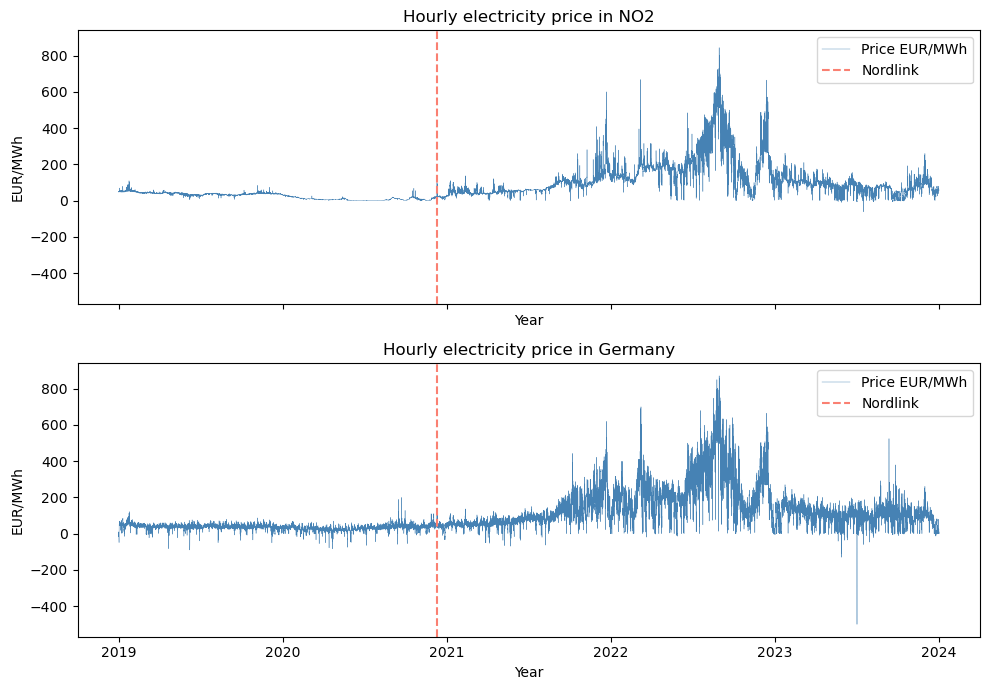

In [4]:
fig1, axes = plt.subplots(2,1, sharex=True, sharey=True, figsize=(10,7))                    # Creates subplots.

Country = ['NO2', 'Germany']                                                                # List of the two countries.

xvalues = df.index.drop_duplicates()                                                        # Gets the x-values for the plots, removes duplicates.
yvalues0 = df[df['MapCode'] == 'NO2']['Price']                                              # Gets the y-values for Norway.
yvalues1 = df[df['MapCode'] == 'DE_LU']['Price']                                            # Gets the y-values for Germany.

yvalues = [yvalues0, yvalues1]                                                              # Puts the yvalues in a list together.

for i in range(2):                                                                          # For loop creating the two subplots.
    axes[i].plot(xvalues, yvalues[i], lw=0.3, label='Price EUR/MWh', c='steelblue')         # Plots the electricity graph.
    axes[i].axvline(pd.to_datetime('2020-12-09'), ls='--', c='salmon', label='Nordlink')    # Plots the vertical line for opening of Nordlink.
    axes[i].set_title(f'Hourly electricity price in {Country[i]}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('EUR/MWh')                                   
    axes[i].legend()            

fig1.tight_layout()                                                                          # Adjusting the layout.                                                    

#### Conclusion 1
The subplots above demonstrate how the electricity prices in NO2 and Germany have developed over time. Although electricity prices appear to fluctuate more in Germany on a short-term basis, both countries follow the same trend over time. Prior to the opening of Nordlink, both NO2 and Germany had fairly low and stable electricity prices. Immediately after the Nordlink activation, both markets grew slightly. However, approximately one year after the Nordlink activation, a notable increase in price occurred. The price increased significantly until the end of 2022, after which it stabilized at a lower level. Nonetheless, the prices stay more volatile following the launch of Nordlink.

At some points in time, the electricity prices are negative, this is particularly evident in Germany. This indicates that the energy production's costs exceed the revenues. This could be the result of a surplus in energy production relative to demand.


### Task 2

In [5]:
df = df.loc['2019':'2023'].copy()               # Restricting the data for the period 2019-2023.
df['Year'] = df.index.year                      # Creating a new index 'Year' containing only years in the restricted period.

groups = df.groupby(['MapCode','Year'])         # Create a group, with the new index 'Year' and 'MapCode' (Norway or Germany).

table = groups.agg(                             # Creates a new table that calculates the required statistics.
    Mean = ('Price', 'mean'),
    Median = ('Price', 'median'),
    Standard_deviation = ('Price', 'std'),
    Min = ('Price', 'min'),
    Max = ('Price', 'max'),
).round(2)
table                                            # Prints the table

Mean  Median  Standard_deviation     Min     Max
MapCode Year                                                    
DE_LU   2019   37.67   38.06               15.52  -90.01  121.46
        2020   30.47   30.99               17.50  -83.94  200.04
        2021   96.85   75.48               73.68  -69.00  620.00
        2022  235.44  208.34              142.82  -19.04  871.00
        2023   95.18   98.02               47.58 -500.00  524.27
NO2     2019   39.26   38.81                8.23    5.86  109.45
        2020    9.29    6.95                8.26   -1.73   99.92
        2021   75.11   59.34               47.22   -1.97  600.16
        2022  211.28  181.13              125.85    0.04  844.00
        2023   79.44   80.46               36.28  -61.84  261.85

#### Conclusion 2
In recent years, electricity prices in NO2 and Germany have become more extreme. The table above clearly illustrates this increase in price. Although the prices vary in both areas, they follow a similar trend. In 2019 and 2020, before the opening of Nordlink, the prices in Germany were relatively stable at around 30-40 EUR/MWh. In NO2 during the same period, the price ranged from 10 to 40 EUR/MWh. Shortly following the launch of Nordlink, in 2021, both areas experienced a rapid increase in price, with average prices nearly 300% higher than the year before in Germany, and 800% to the prior year in NO2. The substantial growth led to extreme prices in 2022 of 871 EUR/MWh and 844 EUR/MWh, which were the maximum electricity prices at this time in Germany and NO2 respectively. The trend of exponential growth continued until 2023, before the prices in both areas stabilize. Prices remain significantly higher than before Nordlink's activation.

### Task 3

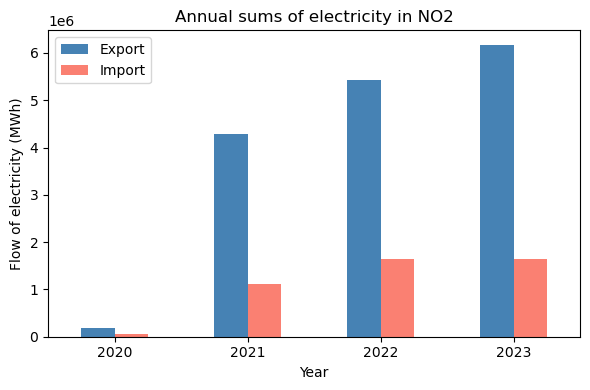

In [6]:
df2['Year'] = df2.index.year                                                                        # Creates a new colum 'year' based on the 'DateTime' index.
df2['Indicator'] = df2.apply(lambda x: 'Import' if x['InMapCode'] == 'NO2' else 'Export', axis = 1) # New colum 'Indicator' to tell if its import or export.

annual_sum = df2.groupby(['Year','Indicator'])['FlowValue'].sum().unstack(level='Indicator')        # New dataframe with colums: Year, Export, Import.

fig3, ax = plt.subplots(figsize=(6,4))                                                              # Creates the plot.

annual_sum.plot(kind='bar', color=['steelblue', 'salmon'], ax=ax)                                   # Plots the new annual_sum group.
ax.set_title('Annual sums of electricity in NO2')                                                   # Adding title.
ax.tick_params(axis='x', rotation=0)                                                                # Rotates the x-ticks 45 degrees.
ax.set_ylabel('Flow of electricity (MWh)')                                                                
ax.set_xlabel('Year')
ax.legend()

fig3.tight_layout()                                                                                  # Adjusting the layout.

#### Conclusion 3
The graph above demonstrates the annual total of imports and exports of electricity from NO2 to Germany. As illustrated in blue, exports from NO2 to Germany have notably exceeded imports. This graph clearly reflects the impact of Nordlink's activation on the electricity market, as there is minimal transmission in advance to the launch. In the following years, the electricity export has grown steadily, while imports have remained lower and have shown relatively modest growth.

### Task 4

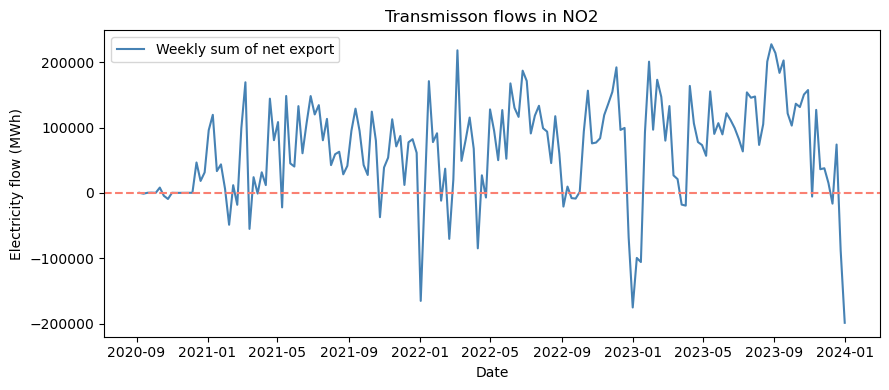

In [7]:
# New colum 'NetExport', where the FlowValue is either positve or negative, depening on if its export or import.
df2['NetExport'] = df2.apply(lambda x: x['FlowValue'] if x['InMapCode'] == 'DE_LU' else -x['FlowValue'], axis=1)    

df2_weekly = df2.resample('W')['NetExport'].sum()                       # Resampeling the data to a weekly frequency, while summing the values in the 'NetExport' colum.

fig4, ax = plt.subplots(figsize=(9,4))                                  # Creates the plot.

ax.plot(df2_weekly, label='Weekly sum of net export', c='steelblue')    # Plots the the new weekly dataframe, adding label and color.
ax.axhline(y=0, c='salmon', ls='--', label='')                          # Creates a horizontal line at y=0.
ax.set_title('Transmisson flows in NO2')                                # Adding titles and labels in the figure.
ax.set_ylabel('Electricity flow (MWh)')
ax.set_xlabel('Date')
ax.legend()

fig4.tight_layout()                                                      # Adjusting the layout.

#### Conclusion 4
The line plot above shows the weekly sum of net exports from NO2 to Germany over time, with positive values indicating net exports and negative values representing net imports. Based on the graph, NO2 has not always exported more than it has imported. The data indicates several weeks of net import, normally occurring during the winter months, where the graph makes consistent spikes below the red line around January each year.

### Task 5

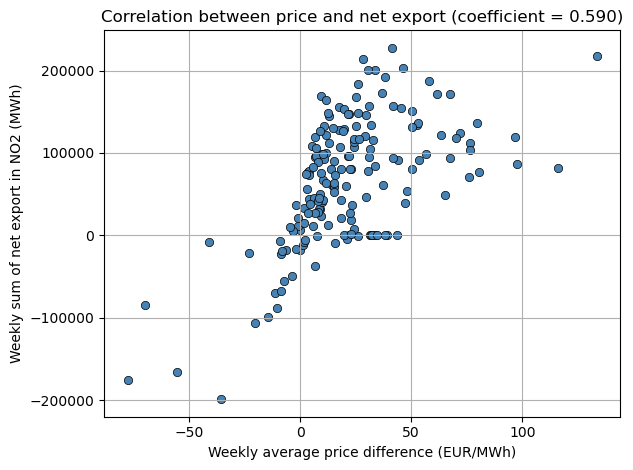

In [8]:
# In this task we continue using the dataframe made in task 4 (df2_weekly).

df_hourly = df.loc['2020-09-06':].copy()                                                                # Restricting the original dataframe to match df2 with transmission flows.
df_hourly['PriceDiff'] = df[df['MapCode'] == 'DE_LU']['Price'] - df[df['MapCode'] == 'NO2']['Price']    # New colum 'PriceDiff' finding the hourly price difference.
df_weekly = df_hourly['PriceDiff'].resample('W').mean()                                                 # Finding the weekly average of the price difference.

correlation = df_weekly.corr(df2_weekly)                                                                # Computing the correlation, between the two dataframes.

fig5, ax = plt.subplots()                                                                               # Creates the plot.

ax.scatter(df_weekly, df2_weekly, c='steelblue', edgecolors='black', linewidth=0.5)                     # Creating a scatter plot between the average price difference and the sum of net export.
ax.set_xlabel('Weekly average price difference (EUR/MWh)')                                              # Adding labels to y- and x-axis.
ax.set_ylabel('Weekly sum of net export in NO2 (MWh)')
ax.set_title(f'Correlation between price and net export (coefficient = {correlation:.3f})', size ='12') # Tiltle with the computed correlation.
ax.grid()

fig5.tight_layout()                                                                                     # Adjusting the layout.

#### Conclusion 5
The scatter plot above describes the relationship between the weekly sum of net exports in NO2 and the weekly average price difference between Germany and NO2. It illustrates a positive relationship between the weekly sum of net exports and the weekly average price difference. The correlation coefficient is 0.590. NO2 tends to export more electricity to Germany when German prices are higher and import more when German prices are lower.

### Task 6

During the assignment, we utilized a variety of resources and tools to optimize the functionality and efficiency of our code. 
First and foremost, we used the Python libraries pandas and matplotlib. We retrieved “plt.tight_layout” from matplotlib and used it in every task to fit subplots within the figure area. Similarly, we used “plt.savefig” to save output figures to the folder we are working in. The pandas library was used in task 1, 3 and 4. In task 1, we used “pd.to_datetime” to convert the ‘DateTime’ column into a pandas datetime object. For task 3 and 4, we used the “DataFrame.apply” function to apply a lambda function to the entire “df2” dataframe. We found the application of the lambda function through the documentation of W3Schools. 

For this assignment, we used generative AI in ChatGPT as a tool for analyzing technical and grammatical errors, and debugging of code. In addition, when struggling to finish writing singular lines of code, ChatGPT acted as an assisting resource, in order to write correct syntax. 
 


### Downloading figures

In [9]:
# Remove ''', and run the code to save the figures and data table in folder 'figures'. 


fig1.savefig('figures/figure_task1.png')
table.to_excel('figures/table_task2.xlsx')
fig3.savefig('figures/figure_task3.png') 
fig4.savefig('figures/figure_task4.png')
fig5.savefig('figures/figure_task5.png')

